In [82]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os
import seaborn as sns

In [83]:
chile_df = pd.read_csv('data_clean/chile_clean.csv')
argentina_df = pd.read_csv('data_clean/argentina_clean.csv')
antartica_df = pd.read_csv('data_clean/antartica_clean.csv')

# ¿Qué diferencias y similitudes existen en la biodiversidad fósil entre estas regiones a lo largo de diferentes eras geológicas?


### Enfoque y Objetivo

En este análisis, buscamos explorar la biodiversidad fósil en Chile, Argentina y Antártida utilizando índices de biodiversidad a lo largo de diferentes eras geológicas. 
El objetivo es comparar la diversidad a seis niveles taxonómicos:
1. **Especies**
2. **Géneros**
3. **Familias**
4. **Órdenes**
5. **Clases**
6. **Filos**


Este enfoque nos permitirá:
- Identificar cómo cambian los patrones de diversidad entre niveles taxonómicos.
- Detectar eras con alta o baja biodiversidad en términos de riqueza y equitatividad.
- Explorar si los patrones observados a nivel de especies se mantienen en niveles taxonómicos más amplios.

Utilizaremos **índices de biodiversidad** como:

### **Índice de Shannon**
$$ H' = -\sum_{i=1}^S p_i \ln(p_i) $$

- $H'$: Índice de Shannon (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.

---

- Mide la diversidad combinando **riqueza** (cantidad de grupos) y **equitatividad** (distribución de los individuos entre los grupos).
- Valores más altos indican mayor diversidad y equitatividad.

| **Índice de Shannon** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | No hay diversidad (solo hay un grupo, por ejemplo, una sola especie).           |
| **1-2**               | Baja diversidad, dominada por unas pocas especies (grupos).                     |
| **3-4**               | Diversidad moderada; hay más grupos y una mejor distribución entre ellos.        |
| **5 o más**           | Alta diversidad; hay una gran cantidad de grupos y están distribuidos uniformemente. |

---

### **Índice de Simpson**

$$ D = 1 - \sum_{i=1}^S p_i^2 $$

- $D$: Índice de Simpson (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.
---
- Mide la **probabilidad de que dos individuos seleccionados al azar pertenezcan al mismo grupo**.
- A diferencia de Shannon, es más sensible a la **dominancia** de unos pocos grupos. Valores altos reflejan **menos dominancia** y mayor equitatividad.

| **Índice de Simpson** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | Total dominancia; todos los individuos pertenecen a un solo grupo.              |
| **0.1-0.4**           | Baja equitatividad; dominancia de unos pocos grupos.                            |
| **0.5-0.7**           | Moderada equitatividad; cierta dominancia, pero con más grupos presentes.        |
| **0.8 o más**         | Alta equitatividad; las especies (grupos) están distribuidas uniformemente.      |

---

### Estructura del Análisis

1. **Calcular índices de biodiversidad**:
   Aplicaremos los índices a las eras con mayor riqueza para **especies**, **géneros**, **familias**, **órdenes**, **clases** y **filos**. Esto nos permitirá observar patrones en todos los niveles taxonómicos y cómo estos cambian a lo largo del tiempo.

2. **Visualizar resultados**:
   Compararemos los índices entre niveles taxonómicos y eras.
3. **Interpretar patrones**:
   Discutiremos cómo los patrones de biodiversidad varían a lo largo del tiempo y entre niveles taxonómicos.

---


## Chile 



In [84]:
#En primer lugar para el analisis taxonomico dropearemos aquellas filas que tengan valores nulos en la columna accepted_name, genus, family, order, class, phylum
chile_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [85]:
# Seleccionar las top 5 eras con más especies únicas
top5_chile_especies = chile_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Chile:")
print(top5_chile_especies)


Top 5 eras por especies únicas en Chile:
era_early
Neogene       645
Jurassic      598
Cretaceous    443
Quaternary    210
Triassic      151
Name: accepted_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile a cada nivel taxonómico (especies, géneros y familias).


In [86]:
from scipy.stats import entropy

# Función para calcular índices de biodiversidad
def calcular_indices(df, eras, nivel_taxonomico):
    indices = {}
    for era in eras.index:
        subset = df[df['era_early'] == era]
        taxon_counts = subset[nivel_taxonomico].value_counts()
        total_counts = taxon_counts.sum()
        proportions = taxon_counts / total_counts
        shannon_index = entropy(proportions, base=2)  # Shannon 
        simpson_index = 1 - sum(proportions**2)      # Simpson
        indices[era] = {'Shannon': shannon_index, 'Simpson': simpson_index}
    return indices



In [87]:
chile_df_p2_generos = chile_df.drop(chile_df[chile_df['genus'] == 'NO_GENUS_SPECIFIED'].index)
chile_df_p2_familias = chile_df.drop(chile_df[chile_df['family'] == 'NO_FAMILY_SPECIFIED'].index)
chile_df_p2_ordenes = chile_df.drop(chile_df[chile_df['order'] == 'NO_ORDER_SPECIFIED'].index)  
chile_df_p2_clases = chile_df.drop(chile_df[chile_df['class'] == 'NO_CLASS_SPECIFIED'].index)   
chile_df_p2_phylum = chile_df.drop(chile_df[chile_df['phylum'] == 'NO_PHYLUM_SPECIFIED'].index)


In [88]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_chile_especies = calcular_indices(chile_df, top5_chile_especies, 'accepted_name')
indices_chile_generos = calcular_indices(chile_df_p2_generos, top5_chile_especies, 'genus')  
indices_chile_familias = calcular_indices(chile_df_p2_familias, top5_chile_especies, 'family')  
indices_chile_ordenes = calcular_indices(chile_df_p2_ordenes, top5_chile_especies, 'order')
indices_chile_clases = calcular_indices(chile_df_p2_clases, top5_chile_especies, 'class')
indices_chile_phylum = calcular_indices(chile_df_p2_phylum, top5_chile_especies, 'phylum')


# Mostrar resultados
print("\nÍndices por especies en Chile:")
print(pd.DataFrame(indices_chile_especies).T)

print("\nÍndices por géneros en Chile:")
print(pd.DataFrame(indices_chile_generos).T)

print("\nÍndices por familias en Chile:")
print(pd.DataFrame(indices_chile_familias).T)

print("\nÍndices por ordenes en Chile:")
print(pd.DataFrame(indices_chile_ordenes).T)

print("\nÍndices por clases en Chile:")
print(pd.DataFrame(indices_chile_clases).T)

print("\nÍndices por phylum en Chile:")
print(pd.DataFrame(indices_chile_phylum).T)




Índices por especies en Chile:
             Shannon   Simpson
Neogene     8.627208  0.995495
Jurassic    7.732674  0.990075
Cretaceous  8.159620  0.994163
Quaternary  7.032858  0.988201
Triassic    6.898211  0.988160

Índices por géneros en Chile:
             Shannon   Simpson
Neogene     7.963480  0.993124
Jurassic    7.055302  0.984711
Cretaceous  7.688936  0.991922
Quaternary  6.663366  0.985421
Triassic    6.288502  0.979896

Índices por familias en Chile:
             Shannon   Simpson
Neogene     6.805490  0.984770
Jurassic    5.833524  0.970931
Cretaceous  6.366124  0.979647
Quaternary  5.728536  0.970187
Triassic    5.666709  0.969217

Índices por ordenes en Chile:
             Shannon   Simpson
Neogene     4.938961  0.932146
Jurassic    3.709118  0.876582
Cretaceous  4.454115  0.887394
Quaternary  4.433645  0.925011
Triassic    4.538763  0.942200

Índices por clases en Chile:
             Shannon   Simpson
Neogene     2.579828  0.740347
Jurassic    1.790354  0.586619
Cretace

## Visualización de Índices de Biodiversidad en Chile

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile, comparando los diferentes niveles taxonómicos.


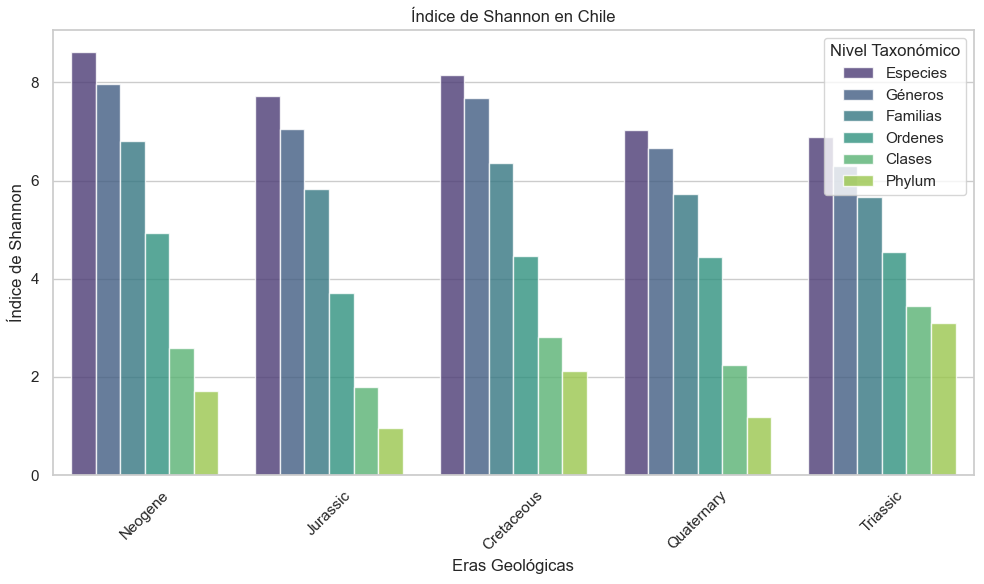

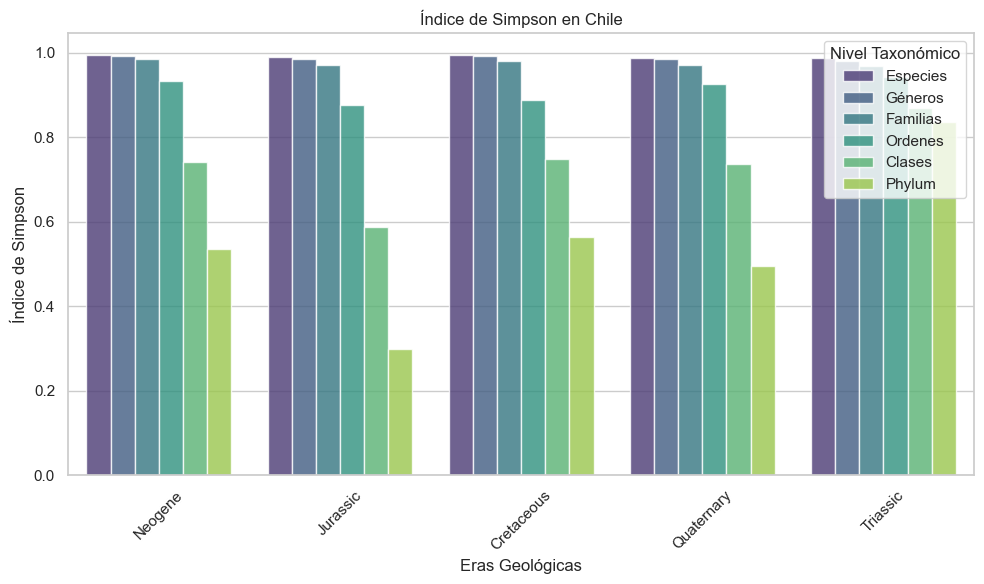

In [101]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_chile_especies).T
df_generos = pd.DataFrame(indices_chile_generos).T
df_familias = pd.DataFrame(indices_chile_familias).T
df_ordenes = pd.DataFrame(indices_chile_ordenes).T
df_clases = pd.DataFrame(indices_chile_clases).T
df_phylum = pd.DataFrame(indices_chile_phylum).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

# Combinar todos los niveles taxonómicos
df_total_chile = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_chile.reset_index(inplace=True)
df_total_chile.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### **Observaciones**

1. **Neogene como la era de mayor diversidad**:
   - El **Neogene** destaca como la era con los índices de Shannon más altos en todos los niveles taxonómicos, desde especies hasta filos. 
   - Esto sugiere una biodiversidad excepcionalmente rica y bien distribuida durante este período, reflejando condiciones ambientales favorables o eventos evolutivos significativos.

2. **Cretaceous con una alta diversidad**:
   - El **Cretaceous** muestra valores altos en los índices de Shannon para géneros y familias, aunque en niveles superiores, como órdenes y clases, se observa una ligera disminución en la diversidad.
   - Los índices de Simpson para esta era indican una buena equitatividad, lo que implica una distribución equilibrada entre los grupos presentes.

3. **Triassic como la era de menor diversidad**:
   - En todos los niveles taxonómicos, el **Triassic** presenta los índices de Shannon más bajos. Esto indica una riqueza limitada en comparación con otras eras.
   - Los índices de Simpson también muestran una menor equitatividad relativa, lo que sugiere una dominancia de unos pocos grupos durante esta era.

4. **Relación entre niveles taxonómicos**:
   - A medida que se asciende en la jerarquía taxonómica, desde especies hasta filos, los índices de Shannon disminuyen de manera consistente. Esto refleja que, aunque hay muchas especies presentes, el número de grupos en niveles superiores es más reducido.
   - Por otro lado, los índices de Simpson permanecen altos en todos los niveles, lo que indica una distribución uniforme entre los grupos dentro de cada nivel taxonómico.

5. **Balance en la biodiversidad**:
   - Los índices de Simpson cercanos a 1 en todas las eras muestran que, independientemente de la riqueza, la biodiversidad está bien distribuida dentro de cada nivel taxonómico. Esto sugiere ecosistemas balanceados con poca dominancia de grupos particulares.

### **Conclusión**:
El análisis de los niveles taxonómicos desde especies hasta filos resalta al **Neogene** como la era con la biodiversidad más rica y balanceada en Chile. Aunque otras eras como el **Cretaceous** muestran una diversidad significativa, el **Triassic** evidencia una biodiversidad más limitada. Este análisis proporciona una visión integral de cómo la biodiversidad fósil varía a través del tiempo y entre niveles taxonómicos.


## Argentina


In [90]:
argentina_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [91]:
# Seleccionar las top 5 eras con más especies únicas
top5_argentina_especies = argentina_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Argentina:")
print(top5_argentina_especies)


Top 5 eras por especies únicas en Argentina:
era_early
Paleogene     1904
Cretaceous    1843
Neogene       1815
Ordovician     914
Jurassic       682
Name: accepted_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina a cada nivel taxonómico (especies, géneros y familias).


In [92]:
argentina_df_p2_genero = argentina_df.drop(argentina_df[argentina_df['genus'] == 'NO_GENUS_SPECIFIED'].index)
argentina_df_p2_familias = argentina_df.drop(argentina_df[argentina_df['family'] == 'NO_FAMILY_SPECIFIED'].index)
argentina_df_p2_ordenes = argentina_df.drop(argentina_df[argentina_df['order'] == 'NO_ORDER_SPECIFIED'].index)
argentina_df_p2_clases = argentina_df.drop(argentina_df[argentina_df['class'] == 'NO_CLASS_SPECIFIED'].index)
argentina_df_p2_phylum = argentina_df.drop(argentina_df[argentina_df['phylum'] == 'NO_PHYLUM_SPECIFIED'].index)


In [93]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_argentina_especies = calcular_indices(argentina_df, top5_argentina_especies, 'accepted_name')
indices_argentina_generos = calcular_indices(argentina_df_p2_genero, top5_argentina_especies, 'genus')
indices_argentina_familias = calcular_indices(argentina_df_p2_familias, top5_argentina_especies, 'family')  
indices_argentina_ordenes = calcular_indices(argentina_df_p2_ordenes, top5_argentina_especies, 'order')
indices_argentina_clases = calcular_indices(argentina_df_p2_clases, top5_argentina_especies, 'class')
indices_argentina_phylum = calcular_indices(argentina_df_p2_phylum, top5_argentina_especies, 'phylum')

# Mostrar resultados
print("\nÍndices por especies en argentina:")
print(pd.DataFrame(indices_argentina_especies).T)

print("\nÍndices por géneros en argentina:")
print(pd.DataFrame(indices_argentina_generos).T)

print("\nÍndices por familias en argentina:")
print(pd.DataFrame(indices_argentina_familias).T)

print("\nÍndices por ordenes en argentina:")
print(pd.DataFrame(indices_argentina_ordenes).T)

print("\nÍndices por clases en argentina:")
print(pd.DataFrame(indices_argentina_clases).T)

print("\nÍndices por phylum en argentina:")
print(pd.DataFrame(indices_argentina_phylum).T)



Índices por especies en argentina:
              Shannon   Simpson
Paleogene    9.960087  0.998153
Cretaceous   9.971598  0.998042
Neogene     10.022243  0.998383
Ordovician   8.958215  0.996215
Jurassic     8.578481  0.995255

Índices por géneros en argentina:
             Shannon   Simpson
Paleogene   9.091181  0.996431
Cretaceous  9.090625  0.996487
Neogene     8.914170  0.996100
Ordovician  7.953243  0.990930
Jurassic    7.963408  0.993094

Índices por familias en argentina:
             Shannon   Simpson
Paleogene   7.215504  0.986745
Cretaceous  7.134241  0.987567
Neogene     6.680568  0.982380
Ordovician  5.921207  0.951311
Jurassic    6.242092  0.978097

Índices por ordenes en argentina:
             Shannon   Simpson
Paleogene   5.582721  0.956545
Cretaceous  5.531884  0.962231
Neogene     4.541274  0.898159
Ordovician  4.375513  0.914334
Jurassic    3.639628  0.825434

Índices por clases en argentina:
             Shannon   Simpson
Paleogene   3.574494  0.856349
Cretaceous  

## Visualización de Índices de Biodiversidad en Argentina

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina, comparando los diferentes niveles taxonómicos.


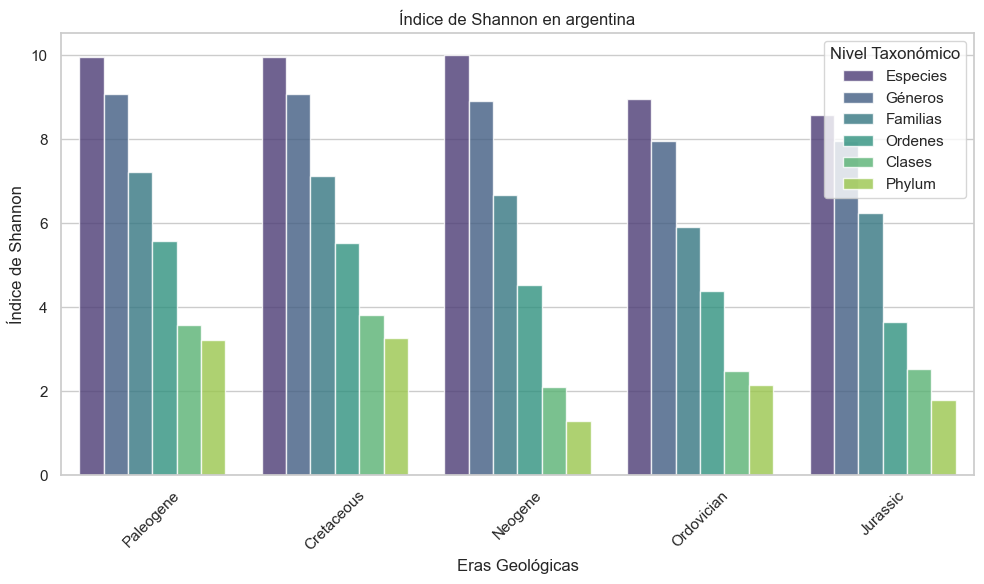

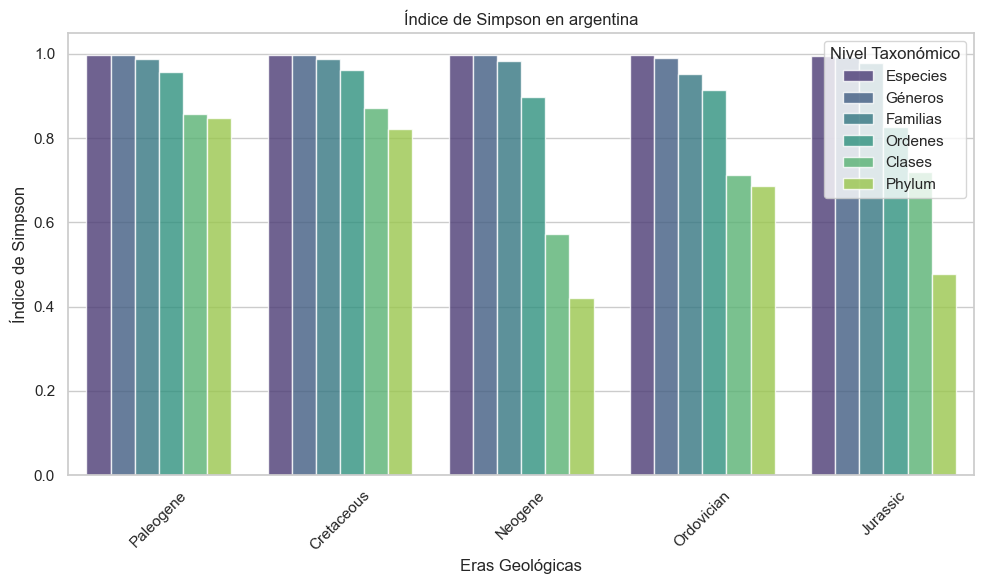

In [100]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_argentina_especies).T
df_generos = pd.DataFrame(indices_argentina_generos).T
df_familias = pd.DataFrame(indices_argentina_familias).T
df_ordenes = pd.DataFrame(indices_argentina_ordenes).T
df_clases = pd.DataFrame(indices_argentina_clases).T
df_phylum = pd.DataFrame(indices_argentina_phylum).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

# Combinar todos los niveles taxonómicos
df_total_argentina = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_argentina.reset_index(inplace=True)
df_total_argentina.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Shannon', hue='Nivel', palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### **Observaciones**

1. **Paleogene como la era más diversa**:
   - El **Paleogene** sobresale con los índices de Shannon más altos en todos los niveles taxonómicos, desde especies hasta filos.
   - Este patrón sugiere un período con una gran diversidad taxonómica y una distribución balanceada entre los grupos presentes.

2. **Cretaceous y Neogene con alta diversidad**:
   - Tanto el **Cretaceous** como el **Neogene** muestran valores altos de Shannon, particularmente en los niveles de especies, géneros y familias.
   - Sin embargo, la diversidad tiende a disminuir levemente en niveles más generales como órdenes y clases.

3. **Ordovician con menor diversidad**:
   - El **Ordovician** presenta índices de Shannon más bajos que las demás eras, especialmente en los niveles de especies y géneros. Esto indica una menor riqueza taxonómica durante este período.

4. **Tendencias entre niveles taxonómicos**:
   - Los índices de Shannon disminuyen gradualmente a medida que se asciende en la jerarquía taxonómica, reflejando una reducción en la riqueza de grupos más amplios como órdenes, clases y filos.
   - Sin embargo, los índices de Simpson permanecen altos, lo que sugiere una distribución equitativa entre los grupos dentro de cada nivel taxonómico.

5. **Distribución equitativa (Simpson)**:
   - Todas las eras muestran índices de Simpson cercanos a 1, indicando ecosistemas balanceados y una distribución uniforme entre los grupos.

### **Conclusión**:
El análisis de múltiples niveles taxonómicos revela que el **Paleogene** es la era más diversa en Argentina, seguido de cerca por el **Cretaceous** y el **Neogene**. A pesar de estas diferencias en riqueza, los índices de Simpson altos en todas las eras reflejan una distribución equilibrada en los grupos presentes, destacando la estabilidad ecológica de los ecosistemas fósiles en estas eras.


## Antartica

In [95]:
antartica_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [96]:
# Seleccionar las top 5 eras con más especies únicas
top5_antartica_especies = antartica_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Antartica:")
print(top5_antartica_especies)


Top 5 eras por especies únicas en Antartica:
era_early
Cretaceous    1082
Paleogene      682
Jurassic       398
Cambrian       197
Neogene        110
Name: accepted_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica a cada nivel taxonómico (especies, géneros y familias).


In [ ]:
antartica_df_p2_genus = antartica_df[antartica_df.family != 'NO_GENUS_SPECIFIED']
antartica_df_p2_familias= antartica_df[antartica_df.family != 'NO_FAMILY_SPECIFIED']
antartica_df_p2_ordenes = antartica_df[antartica_df.order != 'NO_ORDER_SPECIFIED']
antartica_df_p2_clases = antartica_df[antartica_df['class'] != 'NO_CLASS_SPECIFIED']    
antartica_df_p2_phylum = antartica_df[antartica_df['phylum'] != 'NO_PHYLUM_SPECIFIED']


In [98]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_antartica_especies = calcular_indices(antartica_df, top5_antartica_especies, 'accepted_name')
indices_antartica_generos = calcular_indices(antartica_df_p2_genus, top5_antartica_especies, 'genus')  # Misma top 5
indices_antartica_familias = calcular_indices(antartica_df_p2_familias, top5_antartica_especies, 'family')  # Misma top 5
indices_antartica_ordenes = calcular_indices(antartica_df_p2_ordenes, top5_antartica_especies, 'order')
indices_antartica_clases = calcular_indices(antartica_df_p2_clases, top5_antartica_especies, 'class')
indices_antartica_phylum = calcular_indices(antartica_df_p2_phylum, top5_antartica_especies, 'phylum')

# Mostrar resultados
print("\nÍndices por especies en antartica:")
print(pd.DataFrame(indices_antartica_especies).T)

print("\nÍndices por géneros en antartica:")
print(pd.DataFrame(indices_antartica_generos).T)

print("\nÍndices por familias en antartica:")
print(pd.DataFrame(indices_antartica_familias).T)

print("\nÍndices por ordenes en antartica:")
print(pd.DataFrame(indices_antartica_ordenes).T)

print("\nÍndices por clases en antartica:")
print(pd.DataFrame(indices_antartica_clases).T)

print("\nÍndices por phylum en antartica:")
print(pd.DataFrame(indices_antartica_phylum).T)




Índices por especies en antartica:
             Shannon   Simpson
Cretaceous  9.017879  0.996338
Paleogene   8.359675  0.992989
Jurassic    7.980337  0.994396
Cambrian    7.421521  0.993008
Neogene     6.544330  0.986676

Índices por géneros en antartica:
             Shannon   Simpson
Cretaceous  8.212143  0.993433
Paleogene   7.835154  0.989796
Jurassic    6.404770  0.976696
Cambrian    7.168272  0.991198
Neogene     6.310020  0.982459

Índices por familias en antartica:
             Shannon   Simpson
Cretaceous  6.199853  0.973108
Paleogene   6.560792  0.978556
Jurassic    5.172061  0.943419
Cambrian    6.234134  0.981812
Neogene     5.627235  0.969219

Índices por ordenes en antartica:
             Shannon   Simpson
Cretaceous  4.731771  0.915555
Paleogene   5.367070  0.959072
Jurassic    2.364538  0.688997
Cambrian    4.318983  0.928490
Neogene     3.593081  0.856047

Índices por clases en antartica:
             Shannon   Simpson
Cretaceous  3.510670  0.869877
Paleogene   3.5500

## Visualización de Índices de Biodiversidad en Antartica

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica, comparando los diferentes niveles taxonómicos.


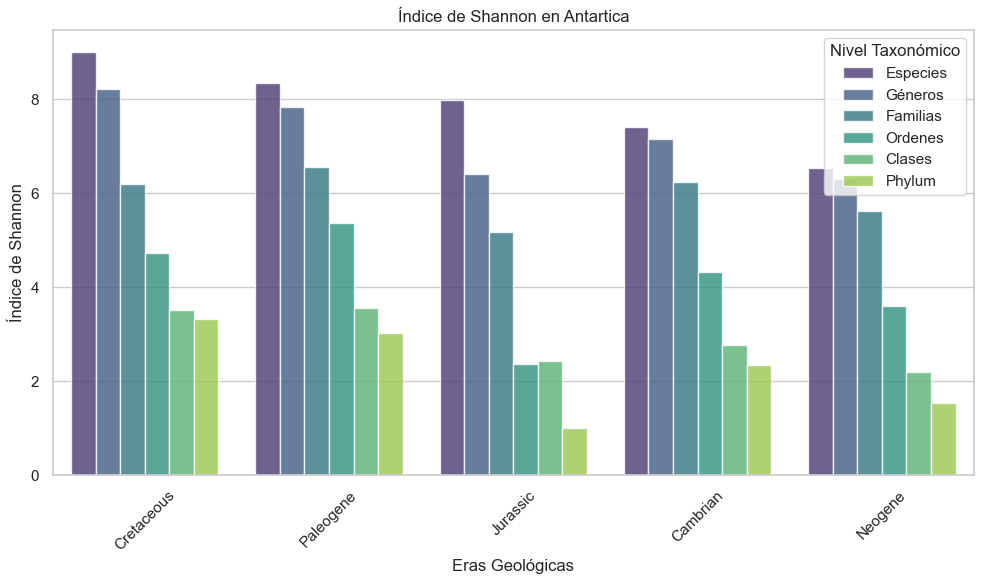

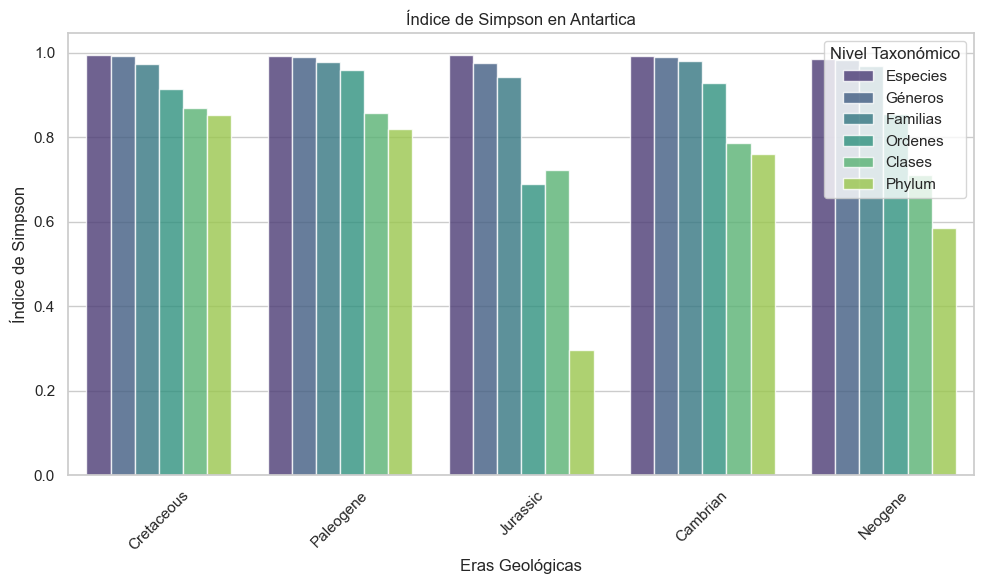

In [99]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_antartica_especies).T
df_generos = pd.DataFrame(indices_antartica_generos).T
df_familias = pd.DataFrame(indices_antartica_familias).T
df_ordenes = pd.DataFrame(indices_antartica_ordenes).T
df_clases = pd.DataFrame(indices_antartica_clases).T
df_phylum = pd.DataFrame(indices_antartica_phylum).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

# Combinar todos los niveles taxonómicos
df_total_antartica = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_antartica.reset_index(inplace=True)
df_total_antartica.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Análisis de la biodiversidad en la Antártida**

1. **Cretaceous como era dominante**:
   - La era **Cretaceous** muestra los valores más altos del índice de Shannon en niveles taxonómicos de **especies** y **géneros**, indicando una diversidad significativa en estos niveles.
   - En niveles más amplios, como **familias**, **órdenes**, y **clases**, la diversidad se mantiene elevada pero con una ligera disminución.

2. **Paleogene con alta equitatividad**:
   - El índice de Simpson en el **Paleogene** es consistentemente cercano a 1 para todos los niveles taxonómicos, lo que indica una distribución equilibrada entre los grupos fósiles.
   - Este patrón sugiere un ecosistema más balanceado en comparación con otras eras.

3. **Cambrian como una era taxonómicamente interesante**:
   - Aunque la diversidad en términos de **especies** es menor, el índice de Shannon muestra valores elevados para **géneros** y **familias**, lo que podría reflejar una diversidad estructural más notable en niveles amplios.

4. **Neogene con diversidad más limitada**:
   - El **Neogene** presenta valores más bajos en los índices de Shannon y Simpson, especialmente en **especies** y **géneros**, lo que sugiere una menor diversidad y equitatividad en esta era.

5. **Equitatividad general en la Antártida**:
   - En todas las eras, los índices de Simpson reflejan una equitatividad alta, lo que sugiere una distribución equilibrada de grupos fósiles entre los niveles taxonómicos.

6. **Relación entre niveles taxonómicos**:
   - Los índices muestran una caída progresiva desde **especies** hacia **phylum**, indicando una disminución en la diversidad a medida que se amplía el nivel taxonómico. Este patrón es consistente con las otras regiones estudiadas.


### **Conclusión**
La Antártida muestra patrones únicos de biodiversidad fósil, donde eras como el **Cretaceous** y el **Paleogene** destacan por su alta diversidad y equitatividad. Sin embargo, en niveles taxonómicos más amplios, como **familias**, **órdenes** y **phylum**, la diversidad disminuye, reflejando una estructura ecológica más concentrada. 

El equilibrio observado en los índices de Simpson sugiere ecosistemas relativamente estables y balanceados en comparación con otras regiones. Esto podría estar relacionado con factores ambientales específicos de la Antártida durante estas eras, como condiciones climáticas o restricciones geográficas. Por otro lado, la menor diversidad en eras como el **Neogene** apunta a posibles limitaciones evolutivas o ambientales en el desarrollo de los ecosistemas en esta región.


## **Comparación entre Chile y Argentina en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En **especies** y **géneros**, Argentina muestra consistentemente una mayor diversidad en todas las eras comunes (*Neogene*, *Jurassic*, *Cretaceous*).
   - En **familias**, Chile alcanza valores similares a los de Argentina en algunas eras (*Neogene* y *Cretaceous*), aunque Argentina mantiene una ligera ventaja.
   - En niveles más amplios, como **órdenes**, **clases** y **phylum**, Argentina también lidera en diversidad, destacando su mayor riqueza taxonómica general.

2. **Equitatividad (Índice de Simpson)**:
   - Ambos países presentan índices de Simpson elevados, reflejando distribuciones relativamente balanceadas entre los diferentes grupos taxonómicos.
   - Argentina tiene una ligera ventaja en equitatividad en los niveles de **especies** y **géneros**, lo que sugiere ecosistemas más equilibrados.
   - En niveles más amplios, como **familias**, **órdenes**, y **clases**, ambos países muestran equitatividad similar.

3. **Patrones Generales**:
   - Argentina destaca por su mayor riqueza en todos los niveles taxonómicos, lo que indica una biodiversidad fósil más amplia.
   - Chile, aunque presenta una menor riqueza en niveles más detallados, mantiene un equilibrio en sus índices de diversidad, especialmente en niveles taxonómicos superiores como **familias** y **órdenes**.
   - Las diferencias observadas pueden estar influenciadas por factores paleogeográficos y ambientales, como la diversidad de hábitats y las condiciones climáticas predominantes en ambas regiones durante las eras geológicas.


<!-- ## **Comparación entre Chile y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En **especies** y **géneros**, Chile y Antártida presentan valores similares en **Jurassic** y **Cretaceous**, aunque Chile tiene una ventaja en **Quaternary**.
   - En **familias**, Chile supera ligeramente a la Antártida en todas las eras comunes (*Jurassic*, *Cretaceous*, y *Quaternary*).
   - En niveles más amplios como **órdenes**, **clases**, y **phylum**, la Antártida muestra una diversidad más consistente entre eras.

2. **Equitatividad (Índice de Simpson)**:
   - Ambos países presentan índices de Simpson elevados, reflejando distribuciones balanceadas en todos los niveles taxonómicos.
   - En **especies**, **géneros**, y **familias**, Chile tiene una leve ventaja en equitatividad durante **Jurassic** y **Cretaceous**, mientras que en **Quaternary**, ambos países muestran resultados similares.

3. **Patrones Generales**:
   - Chile tiende a tener mayor diversidad en niveles taxonómicos más amplios (*familias*, *órdenes*), mientras que la Antártida mantiene una diversidad equilibrada en todos los niveles.
   - La Antártida, al ser un ambiente más extremo y menos diverso, podría explicar los valores más bajos en niveles detallados (*especies*, *géneros*).
   - Las similitudes en equitatividad sugieren que ambas regiones compartían ecosistemas balanceados, aunque influenciados por factores geográficos y ambientales distintos. -->


## **Comparación entre Chile y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En **especies** y **géneros**, Chile y Antártida presentan valores similares en **Jurassic** y **Cretaceous**, aunque Chile tiene una ventaja en **Quaternary**.
   - En **familias**, Chile supera ligeramente a la Antártida en todas las eras comunes (*Jurassic*, *Cretaceous*, y *Quaternary*).
   - En niveles más amplios como **órdenes**, **clases**, y **phylum**, la Antártida muestra una diversidad más consistente entre eras.

2. **Equitatividad (Índice de Simpson)**:
   - Ambos países presentan índices de Simpson elevados, reflejando distribuciones balanceadas en todos los niveles taxonómicos.
   - En **especies**, **géneros**, y **familias**, Chile tiene una leve ventaja en equitatividad durante **Jurassic** y **Cretaceous**, mientras que en **Quaternary**, ambos países muestran resultados similares.

3. **Patrones Generales**:
   - Chile tiende a tener mayor diversidad en niveles taxonómicos más amplios (*familias*, *órdenes*), mientras que la Antártida mantiene una diversidad equilibrada en todos los niveles.
   - La Antártida, al ser un ambiente más extremo y menos diverso, podría explicar los valores más bajos en niveles detallados (*especies*, *géneros*).
   - Las similitudes en equitatividad sugieren que ambas regiones compartían ecosistemas balanceados, aunque influenciados por factores geográficos y ambientales distintos.


## **Comparación entre Argentina y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En **especies** y **géneros**, Argentina muestra consistentemente mayor diversidad que la Antártida en todas las eras comunes (*Jurassic*, *Cretaceous*, y *Paleogene*).
   - En **familias**, Argentina también lidera, especialmente en **Cretaceous** y **Paleogene**, mientras que las diferencias son menores en **Jurassic**.
   - En niveles más amplios como **órdenes**, **clases**, y **phylum**, la ventaja de Argentina sigue siendo evidente, reflejando una mayor riqueza taxonómica.

2. **Equitatividad (Índice de Simpson)**:
   - Ambos países muestran índices de Simpson elevados en todos los niveles taxonómicos, lo que indica distribuciones relativamente balanceadas.
   - La Antártida tiene una equitatividad ligeramente mayor en **especies** y **géneros** durante **Cretaceous**, mientras que Argentina tiene mejores resultados en **Paleogene** y **Jurassic**.
   - En niveles amplios como **familias**, **órdenes**, y **clases**, Argentina domina en equitatividad durante todas las eras comunes.

3. **Patrones Generales**:
   - Argentina muestra una biodiversidad más rica y equilibrada en todos los niveles taxonómicos, lo que refleja un ecosistema más diverso y dinámico.
   - La Antártida, aunque con menor diversidad, mantiene una buena equitatividad, lo que sugiere ecosistemas balanceados a pesar de la menor riqueza taxonómica.
   - Las diferencias en riqueza y equitatividad entre ambas regiones podrían estar influenciadas por las condiciones climáticas y geográficas particulares de cada región durante las eras geológicas comunes.
